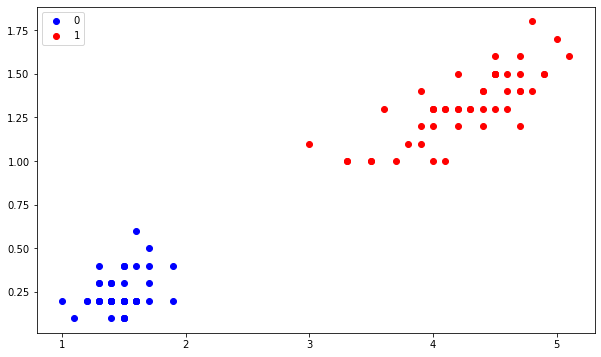

In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal.csv', dtype=None, delimiter=',', skip_header=1) 

X_data = iris[:, :2]
y_data = iris[:, 2]

plt.figure(figsize=(10, 6))
plt.scatter(X_data[y_data == 0][:, 0], X_data[y_data == 0][:, 1], color='b', label='0')
plt.scatter(X_data[y_data == 1][:, 0], X_data[y_data == 1][:, 1], color='r', label='1')
plt.legend()

In [2]:
# shuffle
inds = np.arange(X_data.shape[0])
np.random.shuffle(inds)

X_data = X_data[inds]
y_data = y_data[inds]

print(X_data.shape)
print(y_data.shape)

(100, 2)
(100,)


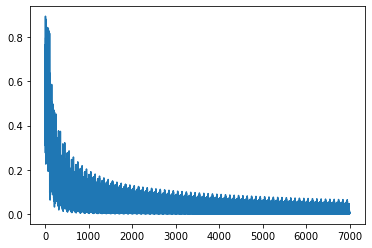

In [7]:
import math

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_hat, y):
    return -y*math.log(y_hat) - (1-y)*math.log(1-y_hat)

def predict(x1, x2, w1, w2, b):
    z = x1*w1 + x2*w2 + b
    y_hat = sigmoid_function(z)
    return y_hat

def compute_gradient(x1, x2, y_hat, y):
    dl_dw1 = x1*(y_hat - y)
    dl_dw2 = x2*(y_hat - y)
    dl_db  = (y_hat - y)
    
    return dl_dw1, dl_dw2, dl_db

def update(w1, w2, b, dl_dw1, dl_dw2, dl_db, lr):
    w1 = w1 - lr*dl_dw1
    w2 = w2 - lr*dl_dw2
    b  = b - lr*dl_db
    
    return w1, w2, b


lr=0.01
num_iter=700
N = 100

# initialize parameters
w1 = 0.1
w2 = 0.5
b = -0.1

# for tracing
losses = []
accs   = []

for i in range(num_iter):
    for j in range(N):
        # data
        x1 = X_data[j][0]
        x2 = X_data[j][1]
        y  = y_data[j]
        
        # predict
        y_hat = predict(x1, x2, w1, w2, b)

        # compute loss
        loss = loss_function(y_hat, y)

        # compute gradient
        dl_dw1, dl_dw2, dl_db = compute_gradient(x1, x2, y_hat, y)

        # update
        w1, w2, b = update(w1, w2, b, dl_dw1, dl_dw2, dl_db, lr)

        # for tracing
        if(i%10 == 0):
            losses.append(loss)
                   

# show figures
plt.plot(losses)
plt.show()

In [9]:
# compute accuracy
aver_acc = 0.0
for j in range(N):
    # data
    x1 = X_data[j][0]
    x2 = X_data[j][1]
    y  = y_data[j]
    
    # predict 
    y_hat = predict(x1, x2, w1, w2, b).round()
    
    # accuracy for training
    acc = (y_hat == y)
    aver_acc = aver_acc + acc
    
print(aver_acc/N)

1.0
